In [3]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import os
import matplotlib

plotly.offline.init_notebook_mode(connected=True)

In [4]:
points = pd.read_csv('charting-m-points-utf8.csv')
points['player1'] = points['match_id'].str.split('-', expand=True)[4]
points['player2'] = points['match_id'].str.split('-', expand=True)[5]

/Users/andywu/anaconda3/envs/sta160/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning:

Columns (7,9,30,31,32,33,34,51) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
points['server'] = np.where(points['Svr'] == 1, points['player1'], points['player2'])

In [6]:
points['serve_num'] = points.sort_values(['server', 'Pt']).groupby(['server', 'match_id'], sort=False)['Pt'].rank(method="first")

In [7]:
points['1st_serve'] = points['1stNoLet'].str[0]
points['2nd_serve'] = points['2ndNoLet'].str[0]

In [83]:
rf_serves = points[points['server'] == 'Rafael_Nadal'].groupby(['serve_num', '1st_serve']).count()['match_id'].reset_index()

In [84]:
rf_serves_clean = rf_serves[rf_serves['1st_serve'].isin(['4','5','6'])]

In [85]:
rf_serves_sum = rf_serves_clean.merge(rf_serves_clean.groupby('serve_num').agg({'match_id': 'sum'}), on='serve_num')

In [86]:
rf_serves_sum['percent'] = rf_serves_sum['match_id_x']/rf_serves_sum['match_id_y']

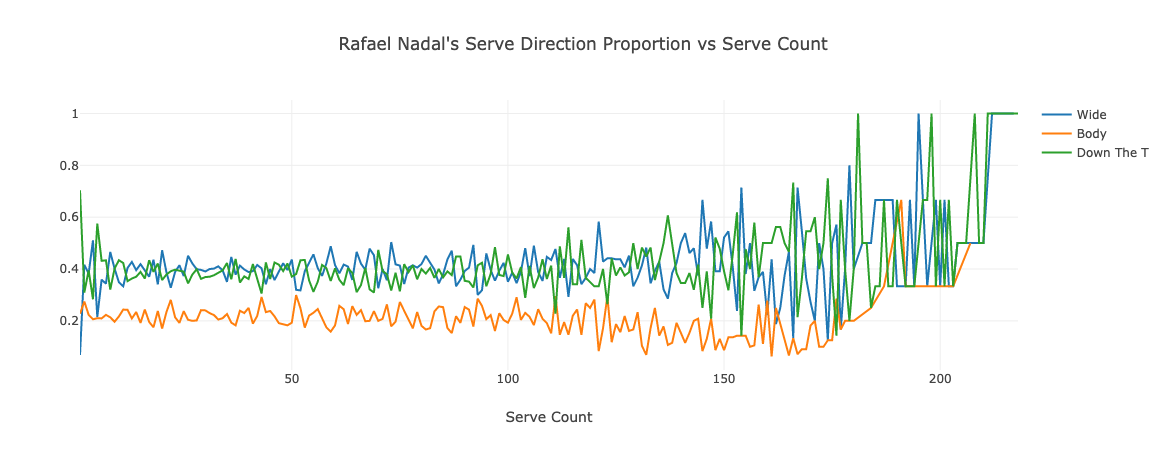

In [87]:
trace1 = go.Scatter(
    x=rf_serves_sum[rf_serves_sum['1st_serve'] == '4']['serve_num'],
    y=rf_serves_sum[rf_serves_sum['1st_serve'] == '4']['percent'],
    mode = 'lines',
    name = 'Wide'
)

trace2 = go.Scatter(
    x=rf_serves_sum[rf_serves_sum['1st_serve'] == '5']['serve_num'],
    y=rf_serves_sum[rf_serves_sum['1st_serve'] == '5']['percent'],
    mode = 'lines',
    name = 'Body'
)

trace3 = go.Scatter(
    x=rf_serves_sum[rf_serves_sum['1st_serve'] == '6']['serve_num'],
    y=rf_serves_sum[rf_serves_sum['1st_serve'] == '6']['percent'],
    mode = 'lines',
    name = 'Down The T'
)

data = [trace1, trace2, trace3]
layout = {
    'title': 'Rafael Nadal\'s Serve Direction Proportion vs Serve Count',
    'xaxis': {
        'title': 'Serve Count'
    }
}

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)